### generate images and label images for HIOS TDS manuscript

### figS1

Package versions:<br>
python==3.10.8<br>
numpy==1.23.5<br>
matplotlib==3.6.2<br>
ipywidgets==8.0.4<br>
matplotlib_scalebar==0.8.1<br>
pickleshare==0.7.5

In [1]:
%matplotlib widget

In [2]:
import numpy as np
import matplotlib as matplotlib
import matplotlib.pyplot as plt
#from matplotlib.widgets import Slider, Button
import ipywidgets as widgets

from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1 import make_axes_locatable

from datetime import datetime
import pickle

In [3]:
figsize_w = 15/2.54
fontsize = 12
dpi = 640

In [4]:
#data_folder = r"C:\Main\Data\_Projects\221215_MoS2_Max\230101_MoS2 Max 15.12.22 4QF\230101205338_20kV_hexz0_camz-10_posi_003_good"
data_folder = r'..\data\Figure 2_3_S1\230101205338_20kV_hexz0_camz-10_posi_003_good'

#r'C:\Main\Data\_Projects\221215_MoS2_Max\230101_MoS2 Max 15.12.22 4QF\230101205338_20kV_hexz0_camz-10_posi_003_good'
with open(data_folder + r'\20230213_140933scan_data_bin2_shifts.pkl', 'rb') as f:
    data = pickle.load(f)
for i in list(data.keys()):
    exec(i + '= ' + '(data[i])')
data.keys()

# load optical image
img2_path = r"..\data\Figure 2_3_S1\20230206_134040.tif"

img2_0 = plt.imread(img2_path)

In [5]:
img2_0_shape = img2_0.shape
img2_0_shape

(2160, 2880, 3)

In [6]:
dx_img2_0 = int((img2_0_shape[1] - img2_0_shape[0])/2)
dx_img2_0

360

In [7]:
img2 = img2_0[:,dx_img2_0:img2_0_shape[1]-dx_img2_0,:] #np.copy()

In [8]:
img2.shape

(2160, 2160, 3)

In [9]:
img1 = np.flip(np.rot90(data_sum/(scan_Nx*scan_Ny)), axis = 1)
img2 = (np.rot90(img2,3))

Text(0.5, 1.0, 'Average DPs (unshifted)')

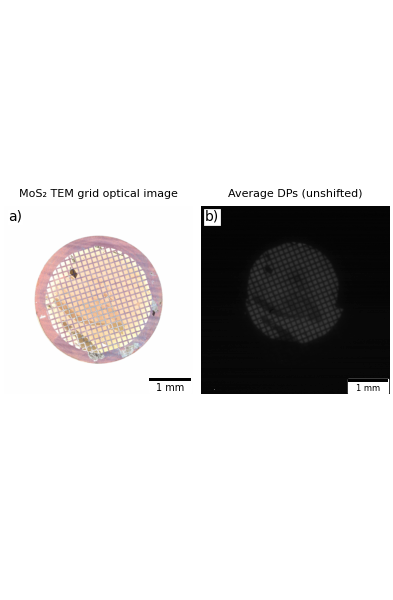

In [10]:
#generate plots for manuscript
param1 = {'textcoords': 'axes fraction', 'horizontalalignment': 'left', 'verticalalignment':'top',
          'bbox':dict(boxstyle="square,pad=0.0", fc="w", ec="w", lw=2)} #axes points

opt_cam_pixel_size = 0.002066 # mm

fs0 = 7
fs1 = 8

xy_pos = (0.02,0.98)

fig, (ax2,ax1) = plt.subplots(1,2,figsize = (figsize_w*2./3.,6), 
                        #gridspec_kw={'height_ratios': [1], 'width_ratios': [img0_ratio,img1_ratio, 1]}, 
                        constrained_layout=True # facecolor = 'gray'
                       )

im2 = ax2.imshow(img2, cmap = 'Greys')
ax2.axis('off')
scalebar2 = ScaleBar(opt_cam_pixel_size, 'mm', location = 'lower right',pad = 0.0,sep = 1, border_pad = 0.1, length_fraction=0.25, width_fraction = 0.02,font_properties = {'size': fs0}) # 1 pixel = 0.2 meter
#scalebar1 = ScaleBar(scale_real, 'nm', location = 'lower right', pad = 0.0,sep = 1, border_pad = 0.1, frameon=True, length_fraction=0.25, width_fraction = 0.02,font_properties = {'size': scalebar_fs}) # 1 pixel = 0.2 meter
ax2.add_artist(scalebar2)
ax2.annotate('a)', xy = (0,0), xytext = (xy_pos[0], xy_pos[1]), **param1)
ax2.set_title('MoS\u2082 TEM grid optical image', fontsize = fs1)

im1 = ax1.imshow((img1), cmap = 'Greys_r', norm=matplotlib.colors.LogNorm())
ax1.axis('off')
scalebar1 = ScaleBar(cam_pixel_size_binned, 'µm', location = 'lower right',pad = 0.0,sep = 1, border_pad = 0.1, length_fraction=0.25, width_fraction = 0.02,font_properties = {'size': 6}) # 1 pixel = 0.2 meter
#scalebar1 = ScaleBar(scale_real, 'nm', location = 'lower right', pad = 0.0,sep = 1, border_pad = 0.1, frameon=True, length_fraction=0.25, width_fraction = 0.02,font_properties = {'size': scalebar_fs}) # 1 pixel = 0.2 meter
ax1.add_artist(scalebar1)
ax1.annotate('b)', xy = (0,0), xytext = (xy_pos[0], xy_pos[1]), **param1)
ax1.set_title('Average DPs (unshifted)', fontsize = fs1)

In [11]:
date_str = datetime.now().strftime("%Y%m%d_%H%M%S")
plt.savefig('figS1_' + date_str + '.png',dpi = dpi,bbox_inches = "tight")